## Step 1: Importing the Libraries and Exploring the Data

In [171]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score,roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

In [52]:
data = pd.read_csv("bankloan.csv")
data.head()

,ID,Age,Experience,Income,ZIP.Code,Family,CCAvg,Education,Mortgage,Personal.Loan,Securities.Account,CD.Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [123]:
data.sample(10)

,Age,Income,ZIP.Code,Family,CCAvg,Education,Mortgage,Personal.Loan,Securities.Account,CD.Account,Online,CreditCard
3701,51,24,94301,3,4.8,1,0,0,0,0,1,1
4782,25,121,93106,1,64.8,1,158,0,0,0,1,0
2174,65,80,94105,1,9.6,3,0,0,0,0,1,0
4328,33,140,95814,1,55.2,1,0,0,0,0,1,0
2042,51,188,94305,2,82.8,2,343,1,0,0,1,0
1815,51,60,90401,4,31.2,1,97,0,0,0,1,0
517,32,50,90401,4,25.2,3,0,0,1,1,1,1
1283,46,42,92691,1,28.8,1,0,0,0,0,1,1
1146,35,104,91320,3,7.2,2,0,0,0,0,0,1
2105,62,54,91320,1,9.6,1,0,0,1,0,0,1


In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP.Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal.Loan       5000 non-null   int64  
 10  Securities.Account  5000 non-null   int64  
 11  CD.Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [56]:
data.duplicated().value_counts()

False    5000
dtype: int64

#### The Dataset contains data about the bank custormer and his response to the last bank loan campaign
##### The Features Describe the Follwing:
* ID: Customer ID

* Age: Age of the customer (Years)

* Experience: Amount of work experience (Years)

* Income: Amount of annual income (Thousands)

* Zipcode: Postal code of where the client live

* Family: Number of family members

* CCAvg: Average monthly spending with the credit card (Thousands)

* Education: Education level (1: bachelor's degree, 2: master's degree, 3: PhD/professional degree)

* Mortgage: Value of home mortgage if any (Thousands)

* Securities Account: Does the customer have a securities account?

* CD Account: Does the customer have a certificate of deposit account (CD)?

* Online: Does the customer use the online banking system?

* CreditCard: Does the customer use his credit card?

* Personal Loan: Did this customer accept the personal loan offered in the last campaign? `(Target Variable)`

In [ ]:
data.describe()

,ID,Age,Experience,Income,ZIP.Code,Family,CCAvg,Education,Mortgage,Personal.Loan,Securities.Account,CD.Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [57]:
categories = data.drop(['ID','Age','Experience','Income','ZIP.Code','CCAvg','Mortgage'],axis=1)
for column in categories.columns:
    value_counts = categories[column].value_counts()
    percentage_values = (value_counts / len(categories)) * 100
    print(f"Percentage of values in {column}:\n{percentage_values}\n")

Percentage of values in Family:
1    29.44
2    25.92
4    24.44
3    20.20
Name: Family, dtype: float64

Percentage of values in Education:
1    41.92
3    30.02
2    28.06
Name: Education, dtype: float64

Percentage of values in Personal.Loan:
0    90.4
1     9.6
Name: Personal.Loan, dtype: float64

Percentage of values in Securities.Account:
0    89.56
1    10.44
Name: Securities.Account, dtype: float64

Percentage of values in CD.Account:
0    93.96
1     6.04
Name: CD.Account, dtype: float64

Percentage of values in Online:
1    59.68
0    40.32
Name: Online, dtype: float64

Percentage of values in CreditCard:
0    70.6
1    29.4
Name: CreditCard, dtype: float64



#### Categorical Variables Analysis:
* Education - 42% of candidates have bachelor's degree and 30% have master's degree and 28% are professionals.
* Family - Around 29% of the customer's family size is 1, 26% is 2, 20% is 3 and 24% is 4.
#### Boolean Variables Analysis:
* Personal Loan - About 90% of the customers did not accept the personal loan offered in the last campaign, We have biased data.
* Securities Account - Around 90% of customers do not have a securities account with the bank.
* CD Account - 94% of customers do not have a CD account with the bank.
* Online - Around 60% of customers use internet banking facilities.
* CreditCard - Around 71% of customers do not use credit cards.
#### Numerical Varibles Analysis:
* Age - The mean age of the customers is 45 with standard deviation of 11.5, Data is fairly symmetrical.
* Zip code - The only note on zip code that it has a noise where the minimum value is far down from the 25th percentile of the data.
* CCAvg - The mean of average spending on credit cards per month is 1.94 with standard deviation of 1.75. The data is highly positive skewed.
* Income - The mean annual income of the customer is 73.77 with standard deviation of 46. The data is moderately positive skewed.
* Mortgage - The mean value of house mortgage is 56.5 with standard deviation of 101.71! The data is highly positive skewed 

#### `The next step will support our analysis with visualizations`

----------------

## Step 2: Data Visualization

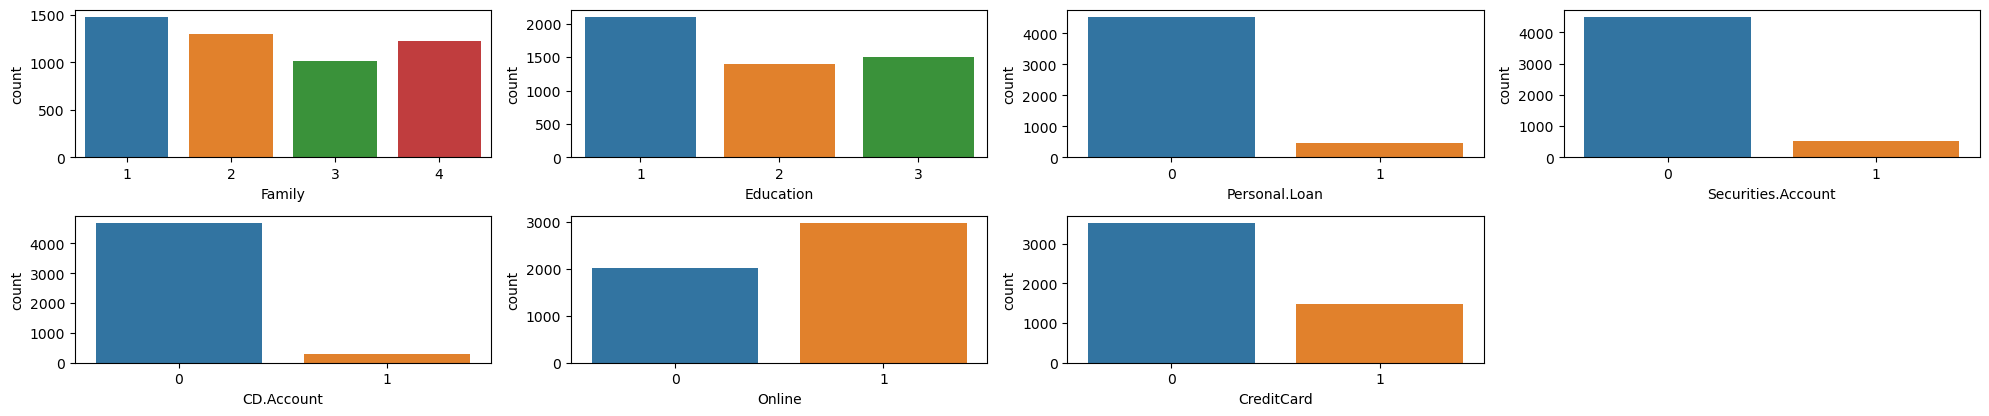

In [58]:
categories = data.drop(['ID','Age','Experience','Income','ZIP.Code','CCAvg','Mortgage'],axis=1)

fig = plt.figure(figsize=(20, 10))
for idx, col in enumerate(categories.columns, 1):
    ax = fig.add_subplot(5, 4, idx)
    sns.countplot(x=data[col], ax=ax)

plt.tight_layout()

C:\Users\Divo\AppData\Local\Temp\ipykernel_12260\1970748214.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col], ax=ax,kde=False)


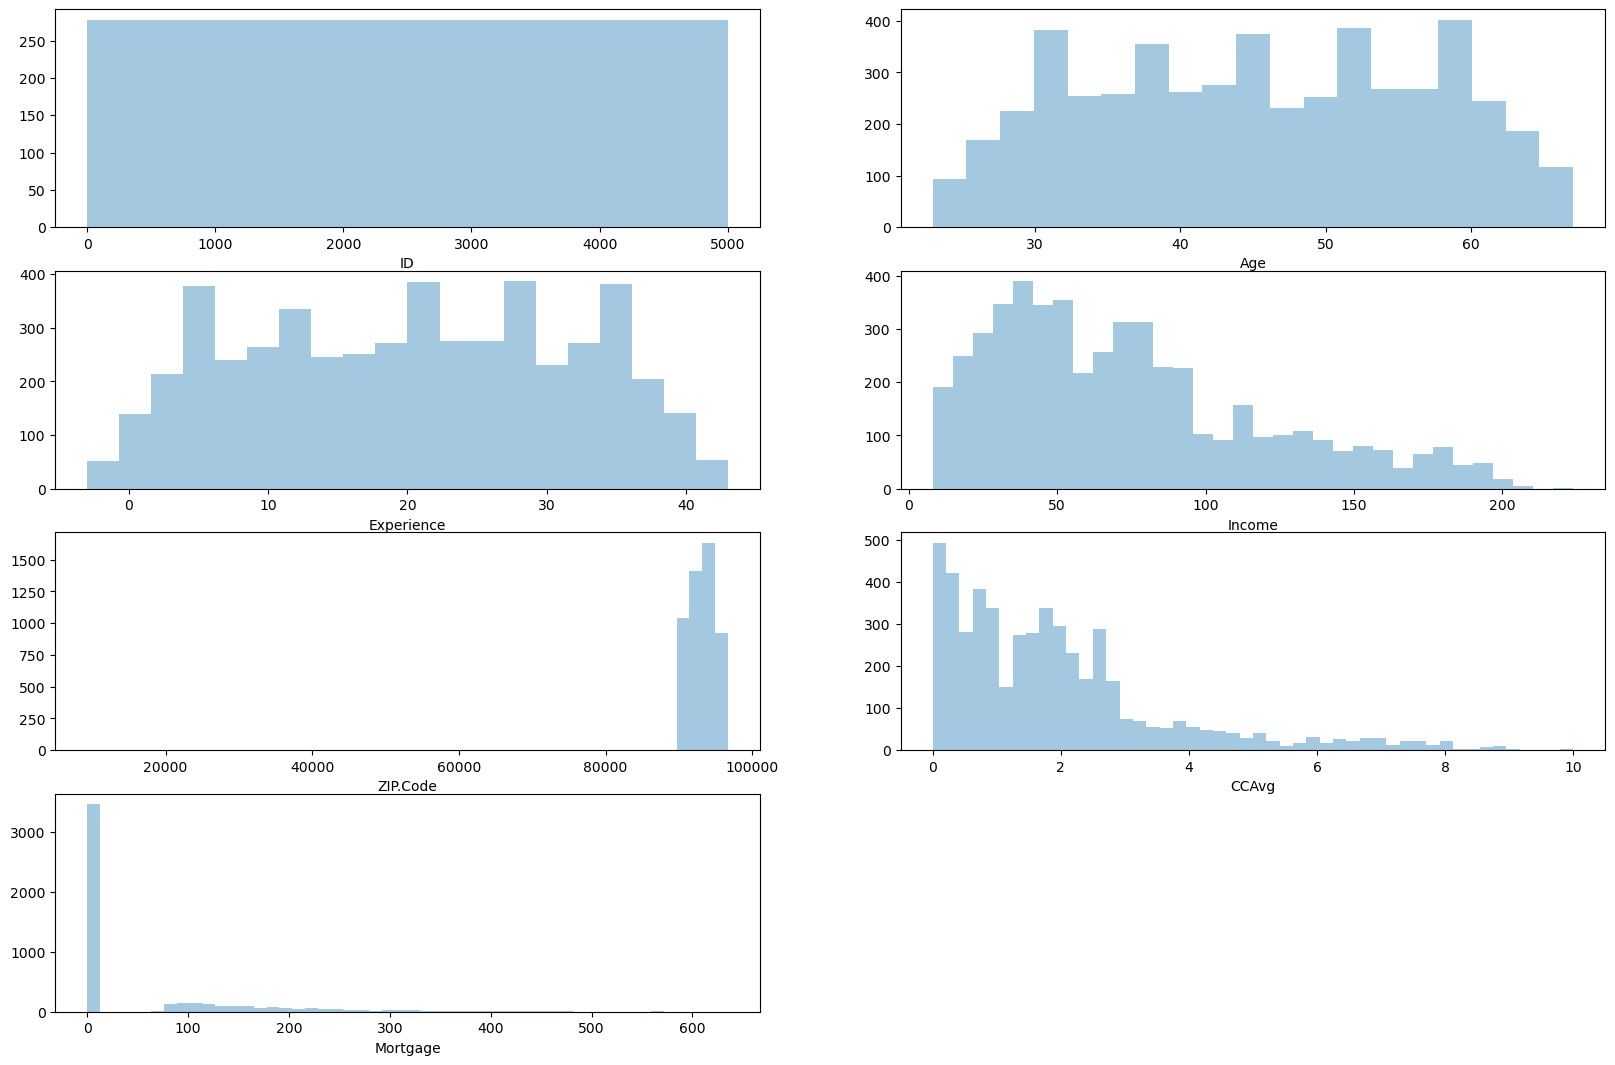

In [59]:
contiuous_data = ['ID','Age','Experience','Income','ZIP.Code','CCAvg','Mortgage']

plt.figure(figsize=(20,30))
for i, col in enumerate(data[contiuous_data].columns):
    ax = plt.subplot(9, 2, i+1)
    sns.distplot(data[col], ax=ax,kde=False)
    plt.xlabel(col)
        
plt.show()

##### From the last two plots we deduce the following:
* The dataset has data on 5000 observations for bank customers.
* We have 14 features including 13 independent variables and 1 dependent variable (`Personal.Loan`).
* We have 6 continuous variables: ID , Age , Experience , Income , CC_Avg , Mortgage.
* We have 2 categorical variables: Family , Education.
* We have 5 Boolean variables: Personal_Loan , Securities Account , CD_Account , Online , Credit_Card.
* The zip code contains very large numbers that has no use in our analysis.
* There is no missing value in the dataset.
* There are no duplicates in the dataset.
* The dataset contains negative values for the Experience, which is unreasonable.
> * ID is uniformly distributed. Therefore, ID acts as an identifier and lacks valuable information for the model.

In [60]:
data.drop(['ID'],axis=1,inplace=True)

### Correlation Analysis

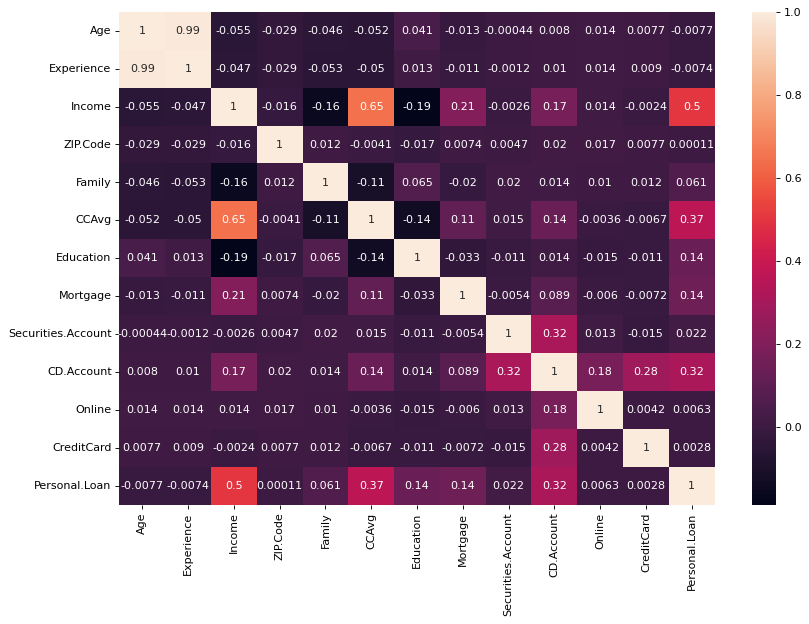

In [61]:
target = 'Personal.Loan'
data_ordered = pd.concat([data.drop(target,axis=1), data[target]],axis=1)
corr = data_ordered.corr(method='pearson')

plt.figure(figsize=(12,8), dpi=80)
sns.heatmap(corr,  annot=True)
plt.show()

##### Correlation Conclusion:
* Personal Loan is highly correlated with Income, CD_Account, CCAvg.
* Experience is highly correlated with Age. (r = 0.99)
* CCAvg is correlated with Income. (r = 0.58)

----------------

## Step 3: Data Cleaining, Noise/Outlier Treatment 

- Checking the disribution of zip code again

c:\Users\Divo\anaconda3\Lib\site-packages\seaborn\distributions.py:2142: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)


Text(12000, 400, 'Noise')

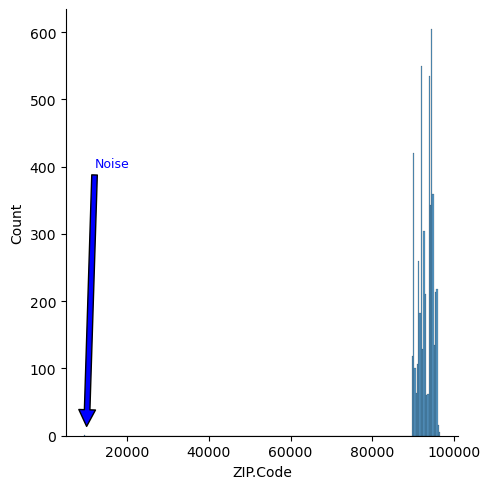

In [71]:
sns.displot(data['ZIP.Code'], ax=ax,kde=False)
plt.annotate('Noise', xy=(10000,10), xytext=(12000,400), color='blue', fontsize=9, 
             arrowprops=dict(facecolor='blue', shrink=0.01))

In [72]:
data[data['ZIP.Code']<20000]

,Age,Experience,Income,ZIP.Code,Family,CCAvg,Education,Mortgage,Personal.Loan,Securities.Account,CD.Account,Online,CreditCard
384,51,25,21,9307,4,0.6,3,0,0,0,0,1,1


We found one noisy observation in zip code data, we dropping this observation because it contains 4 digits while the other observations contain 5 digits

In [74]:
data.drop(data[data['ZIP.Code']<20000].index, inplace=True)
data.reset_index(drop=True, inplace =True)

- Checking the negative values in Experience column

In [76]:
data[data['Experience'] < 0]['Experience'].value_counts()

-1    33
-2    15
-3     4
Name: Experience, dtype: int64

We have 52 negative values for experience, since these values are small relative to the data we have we assume they are recorded incorrectly and replace them with their absolute values.

In [77]:
data['Experience'] = data['Experience'].apply(abs)

- Checking the mortgage graphs again to focus on the outliers

C:\Users\Divo\AppData\Local\Temp\ipykernel_12260\383332484.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Mortgage'])


<Axes: xlabel='Mortgage', ylabel='Density'>

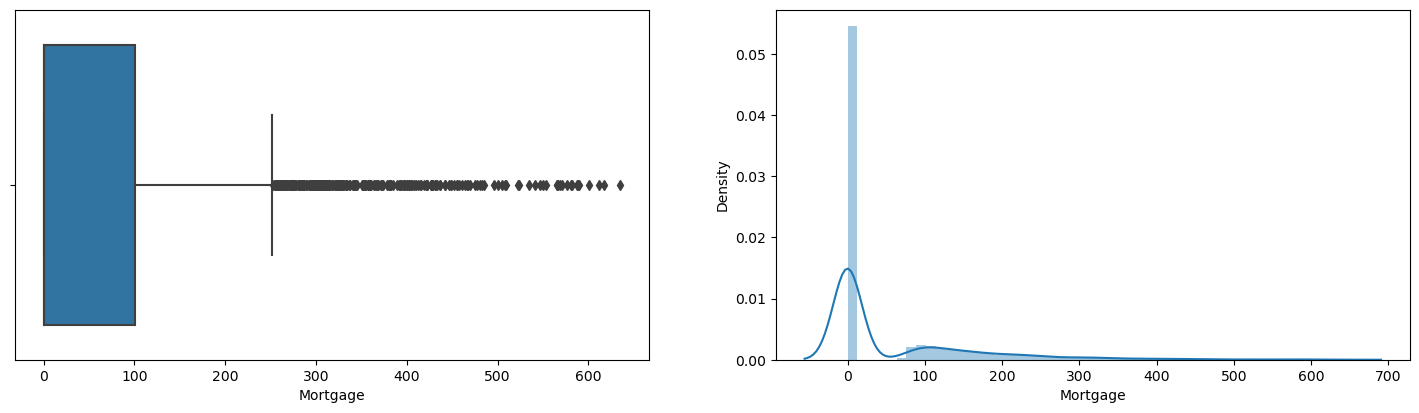

In [86]:
fig= plt.figure(figsize=(18,10))

ax=fig.add_subplot(2,2,1)
sns.boxplot(data=data,x =data['Mortgage'])



ax=fig.add_subplot(2,2,2)
sns.distplot(data['Mortgage'])



To detect the outliers we use the Z-score to detect values more than 3, why 3 not -3? because the data is right skewed which indicates the outliers are only above Z-score of value 3.

In [87]:
data[stats.zscore(data['Mortgage'])>3]['Mortgage'].count()

105

We have 105 Mortgage observations exceeding Z-score of 3, Therfore we consider them outliers and remove them from the data.

In [88]:
mortgage_outliers = data[stats.zscore(data['Mortgage'])>3].index
data.drop(mortgage_outliers, inplace=True)
data.reset_index(drop=True, inplace=True)

- There is neither missing values nor dublicate values in our data, Therefore no null imputation or dublicate treatment needed.

##### Feature Transformation
In the dataset, `CCAVG` denotes the average monthly credit card spending, while `Income` represents annual income. To standardize units, we convert the average monthly credit card spending to an annual value.

In [89]:
data['CCAvg'] = data['CCAvg']*12

##### Analyziing Categorical Features Against the Dependent Variable

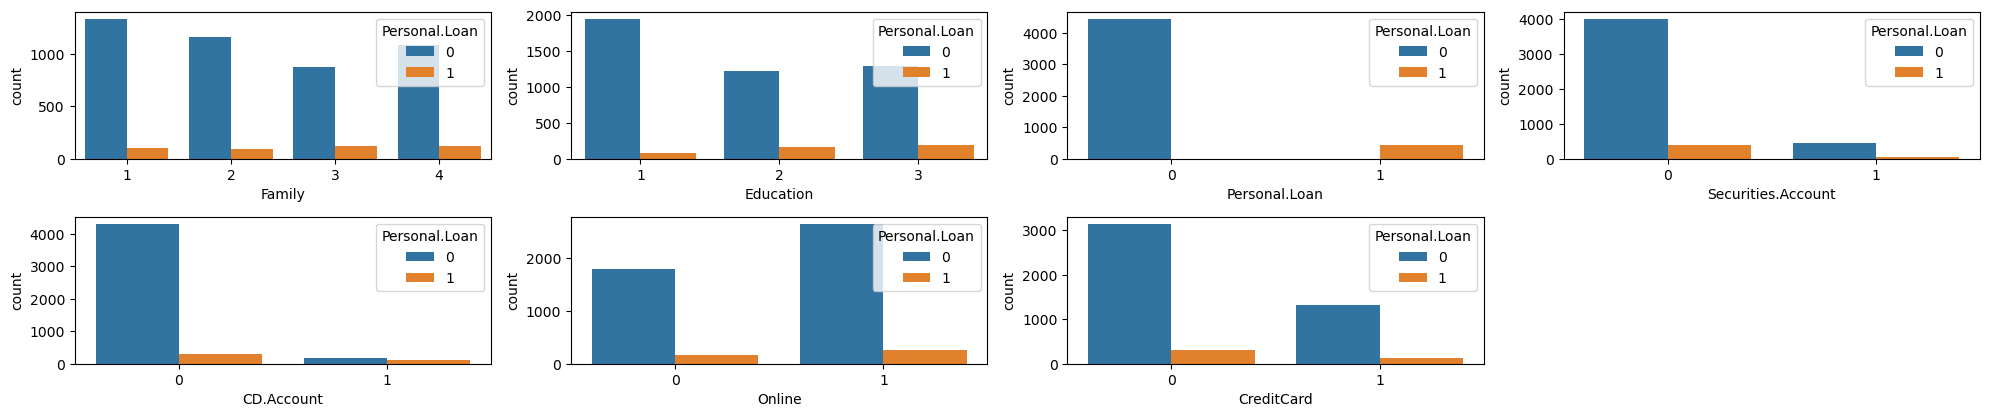

In [92]:
categories = data.drop(['Age','Experience','Income','ZIP.Code','CCAvg','Mortgage'],axis=1)

fig = plt.figure(figsize=(20, 10))
for idx, col in enumerate(categories.columns, 1):
    ax = fig.add_subplot(5, 4, idx)
    sns.countplot(x=col, hue="Personal.Loan", data=categories)

plt.tight_layout()

##### Conclusion
- CD holders often get personal loans from the bank.
- People with more education are more likely to get personal loans.
- The size of the family doesn't affect the chance of getting personal loans.
- Having or not having a securities account doesn't impact the chance of getting a personal loan.
- Whether someone uses internet banking or not doesn't affect the chance of getting a personal loan.
- Having or not having a credit card doesn't seem to impact the chance of getting a personal loan.

##### Analyziing Numerical Features Against the Dependent Variable

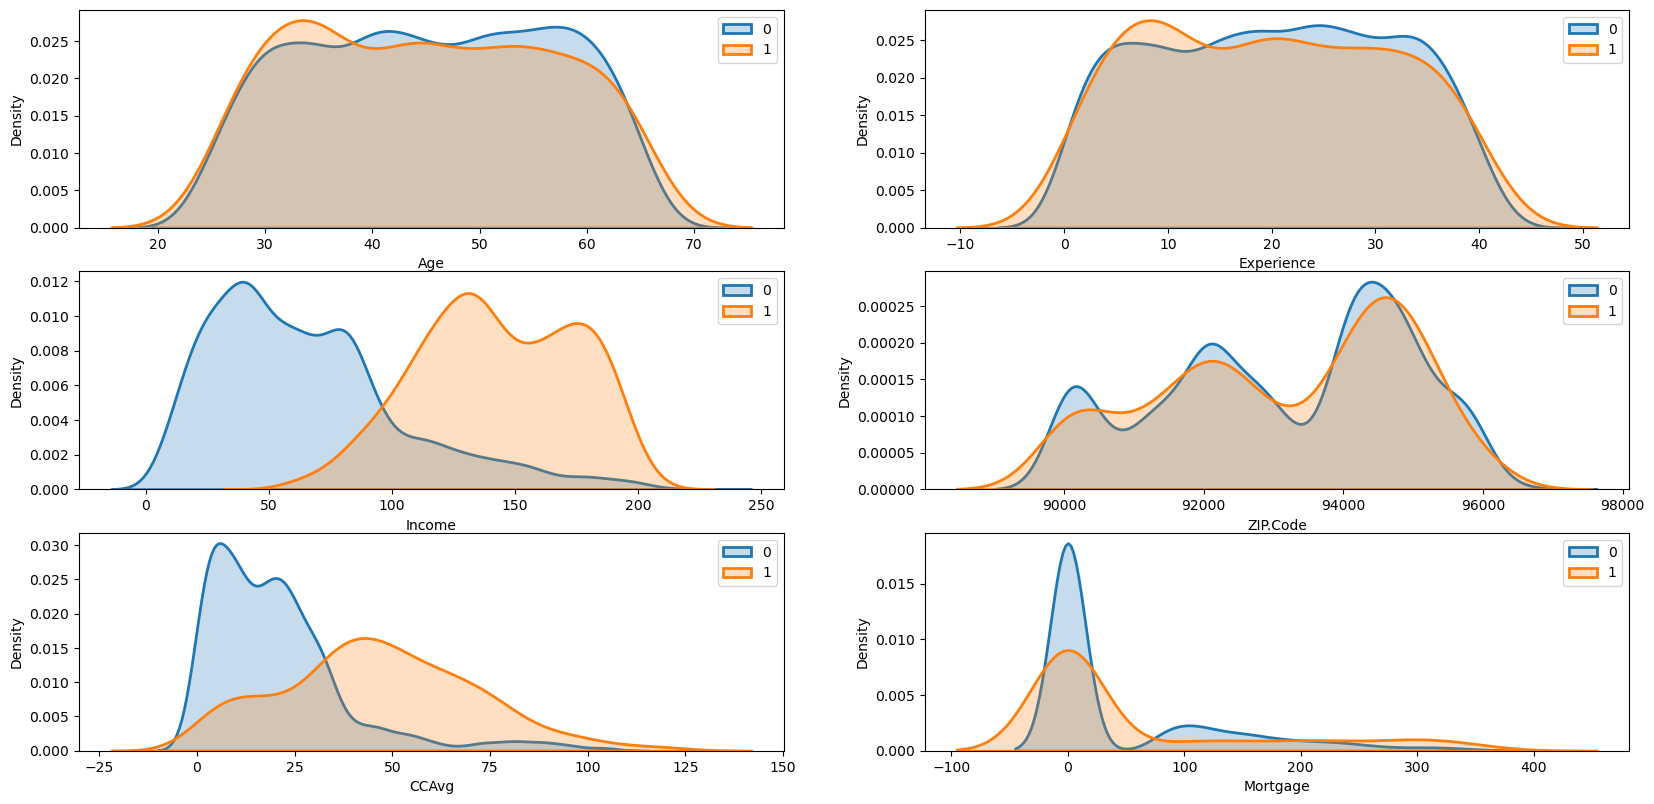

In [105]:
continuous_data = ['Age','Experience','Income','ZIP.Code','CCAvg','Mortgage']
plt.figure(figsize=(20,30))
for i, col in enumerate(data[contiuous_data].columns):
    ax = plt.subplot(9, 2, i+1)
    sns.kdeplot(data=data[data['Personal.Loan']==0], x=col, fill=True, linewidth=2,ax=ax,label='0')
    sns.kdeplot(data=data[data['Personal.Loan']==1], x=col, fill=True, linewidth=2,ax=ax, label='1')
    plt.legend()
    plt.xlabel(col)
        
plt.show()

##### Conclusion
* Customers who spend more on credit cards are more likely to take out personal loans.
* Customers with high incomes are more likely to purchase a personal loan.
* Customers with a high mortgage value are more likely to purchase personal loans.
* It can be inferred that the age of customers has no influence on the probability of purchasing personal loans.
* The correlation between work experience and the likelihood of loan acquisition closely mirrors that observed between customer age and the same probability. Notably, the distribution patterns of both work experience and age align significantly, indicating a robust correlation between the two variables.
> Therefore, we remove Experience because it doesn't provide any more information than Age.

In [106]:
data.drop('Experience', axis=1, inplace=True)

------

## Step 4: Plan of Attack.

The Dependent Variable `Personal Loan` is biased where small amount of customers don't take loans from the bank, as show in the following plot:

<Axes: xlabel='Personal.Loan', ylabel='count'>

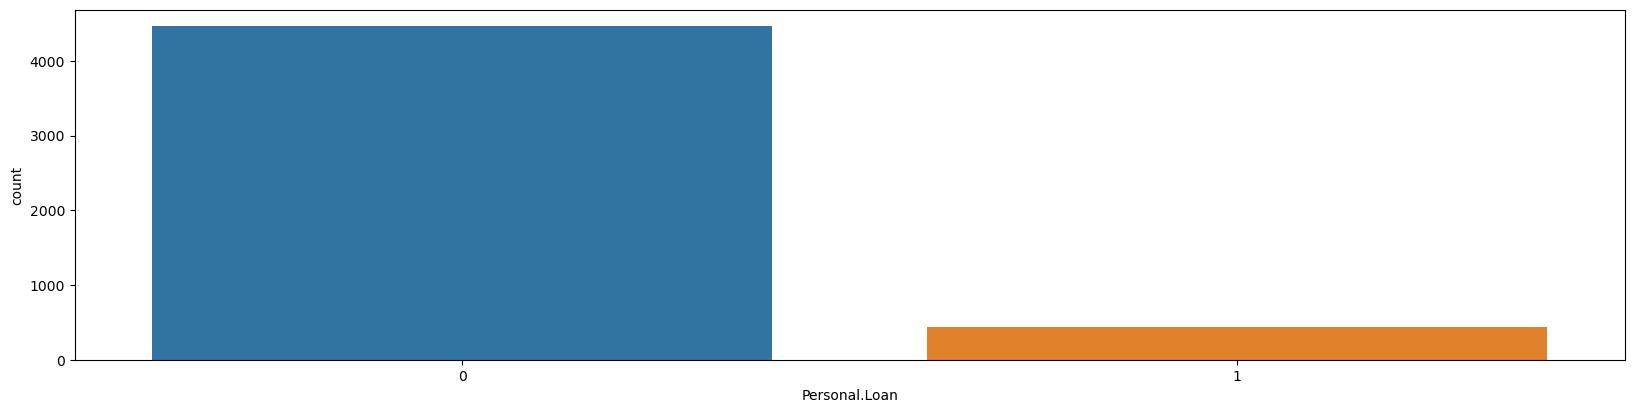

In [117]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(2, 1, 1)
sns.countplot(x=data['Personal.Loan'], ax=ax)

When dealing with biased datasets, where the distribution of classes is uneven, it's important to ensure that the train-test split preserves this bias. The goal is to have a representative proportion of each class in both the training and testing sets. The `stratify` parameter in scikit-learn's train_test_split function helps achieve this.

Also The best way to evaluate biased data predictions is with the F1 score, precision score and recall score.

In [120]:
# Splitting the data
X = data.drop('Personal.Loan', axis=1)
y = data['Personal.Loan'] 

---

## Step 5: Building the Models

Here we are going to use these classification models:
1. Logistic regression
2. K-Nearest Neighbors
3. Support Vector Machine
4. Naive Bayes
5. Decision Tree
6. Random Forest
7. XGBoost


Making a function to do all our repeated business

In [200]:
def predict_and_report(model,X_train, X_test, y_train, y_test,name,namelist,acc_list,f1_list):
    # Fitting the model
    model.fit(X_train,y_train)
    # Makking Prediction
    y_pred = model.predict(X_test)
    # Confusion Matrix
    cm = confusion_matrix(y_test,y_pred)
    # Calculating and printing the Accuracy
    acc = accuracy_score(y_test,y_pred)
    f1 = f1_score(y_test, y_pred, average='binary')
    namelist.append(name)
    acc_list.append(acc)
    f1_list.append(f1)
    print("Performance of",name, "model\n")
    print('Accuracy Score',acc)
    print('-'*50,'\nClassification Report for test set')
    print(classification_report(y_test,y_pred))
    print('-'*50,'\nConfusion Matrix')
    print(cm,'\n')
    print(' Precision Score: ',precision_score(y_test, y_pred, average='binary'),'\n',
    "Recall Score: ",recall_score(y_test, y_pred, average='binary'),'\n',
    'F1 Score: ',f1,'\n')

In [218]:
# Making a dataframe to store the accuracy and f1 Score
scores = pd.DataFrame(columns=['Model Name','Accuracy','F1 score'])
names = []
acc = []
f1s = []

#### Importing the models

In [219]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

#### Logistic Regression Model

Splitting the data

In [220]:
# Perform train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)
# Scale the training and test data using the same scaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

Building the model

In [221]:
# Define the base model
lr = LogisticRegression()
# Passing the model to the Function
predict_and_report(lr,X_train_scaled,X_test_scaled,y_train,y_test,"Logistic Regression",names,acc,f1s)


Performance of Logistic Regression model

Accuracy Score 0.9458631256384066
-------------------------------------------------- 
Classification Report for test set
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       892
           1       0.75      0.59      0.66        87

    accuracy                           0.95       979
   macro avg       0.86      0.78      0.81       979
weighted avg       0.94      0.95      0.94       979

-------------------------------------------------- 
Confusion Matrix
[[875  17]
 [ 36  51]] 

 Precision Score:  0.75 
 Recall Score:  0.5862068965517241 
 F1 Score:  0.6580645161290322 



* The Logistic Regression model got an accuracy of 94% but an F1 score of 65%, let's check other models to see if we can improve the results.

#### K-Nearest Neigbors Model

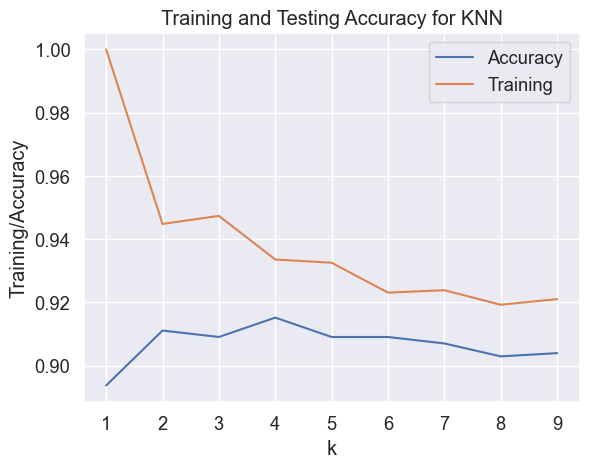

In [222]:
# Create a KNeighborsClassifier model with different values of k
ks = range(1, 10)
accuracies = []
trainings = []

for k in ks:
  # Create a KNeighborsClassifier model with k neighbors
  knn = KNeighborsClassifier(n_neighbors=k)

  # Fit the model to the training set
  knn.fit(X_train, y_train)

  
  # Calculate the accuracy of the model on the training set and the testing set
  training_accuracy = knn.score(X_train, y_train)
  testing_accuracy = knn.score(X_test, y_test)

  accuracies.append(testing_accuracy)
  trainings.append(training_accuracy)

# Plot the accuracy vs. k
plt.plot(ks, accuracies,label="Accuracy")
plt.plot(ks, trainings,label="Training")

plt.xlabel("k")
plt.ylabel("Training/Accuracy")
plt.title("Training and Testing Accuracy for KNN")
plt.legend(labels=["Accuracy", "Training"])
plt.show()

The highest Train accuracy was with 3 neighbors

In [223]:
# Making the base Model
knn = KNeighborsClassifier(n_neighbors=3)
# Passing the model to the Function
predict_and_report(knn,X_train_scaled,X_test_scaled,y_train,y_test,"K-Nearest Neighbors",names,acc,f1s)

Performance of K-Nearest Neighbors model

Accuracy Score 0.9601634320735445
-------------------------------------------------- 
Classification Report for test set
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       892
           1       0.98      0.56      0.72        87

    accuracy                           0.96       979
   macro avg       0.97      0.78      0.85       979
weighted avg       0.96      0.96      0.96       979

-------------------------------------------------- 
Confusion Matrix
[[891   1]
 [ 38  49]] 

 Precision Score:  0.98 
 Recall Score:  0.5632183908045977 
 F1 Score:  0.7153284671532847 



* K-Nearest Neighbors topped the logistic regression model with 96% accuracy and 71% F1 score.

#### Support Vector Machine Model

In [224]:
# Making the model with radial basis function kernel
svc = SVC(kernel = 'rbf', random_state = 0)
# Passing the model to the Function
predict_and_report(svc,X_train_scaled,X_test_scaled,y_train,y_test,"Support Vector Machine",names,acc,f1s)

Performance of Support Vector Machine model

Accuracy Score 0.9724208375893769
-------------------------------------------------- 
Classification Report for test set
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       892
           1       0.98      0.70      0.82        87

    accuracy                           0.97       979
   macro avg       0.98      0.85      0.90       979
weighted avg       0.97      0.97      0.97       979

-------------------------------------------------- 
Confusion Matrix
[[891   1]
 [ 26  61]] 

 Precision Score:  0.9838709677419355 
 Recall Score:  0.7011494252873564 
 F1 Score:  0.8187919463087249 



* With SVM we got better results with 97% accuracy and 82% F1 score.

#### Naive Bayes Model

In [225]:
# Making the model
nb = GaussianNB()
# Passing the model to the Function
predict_and_report(nb,X_train_scaled,X_test_scaled,y_train,y_test,"Gaussian Naive Bayes",names,acc,f1s)

Performance of Gaussian Naive Bayes model

Accuracy Score 0.8855975485188968
-------------------------------------------------- 
Classification Report for test set
              precision    recall  f1-score   support

           0       0.96      0.91      0.94       892
           1       0.40      0.59      0.48        87

    accuracy                           0.89       979
   macro avg       0.68      0.75      0.71       979
weighted avg       0.91      0.89      0.89       979

-------------------------------------------------- 
Confusion Matrix
[[816  76]
 [ 36  51]] 

 Precision Score:  0.4015748031496063 
 Recall Score:  0.5862068965517241 
 F1 Score:  0.47663551401869153 



* Naive Bayes performed poorly on the data with accuracy of 88% and F1 score of 47%.

#### Decision Tree Model

In [226]:
# Making the model
Dt = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
# Passing the model to the Function
predict_and_report(Dt,X_train_scaled,X_test_scaled,y_train,y_test,"Decision Tree",names,acc,f1s)

Performance of Decision Tree model

Accuracy Score 0.982635342185904
-------------------------------------------------- 
Classification Report for test set
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       892
           1       0.90      0.91      0.90        87

    accuracy                           0.98       979
   macro avg       0.94      0.95      0.95       979
weighted avg       0.98      0.98      0.98       979

-------------------------------------------------- 
Confusion Matrix
[[883   9]
 [  8  79]] 

 Precision Score:  0.8977272727272727 
 Recall Score:  0.9080459770114943 
 F1 Score:  0.9028571428571429 



We got even better results with decision tree with 98% accuracy and 90% F1 score.

#### Random Forest Model

In [227]:
# Making the model
rf = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
# Passing the model to the Function
predict_and_report(rf,X_train_scaled,X_test_scaled,y_train,y_test,"Random Forest",names,acc,f1s)

Performance of Random Forest model

Accuracy Score 0.9887640449438202
-------------------------------------------------- 
Classification Report for test set
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       892
           1       0.99      0.89      0.93        87

    accuracy                           0.99       979
   macro avg       0.99      0.94      0.96       979
weighted avg       0.99      0.99      0.99       979

-------------------------------------------------- 
Confusion Matrix
[[891   1]
 [ 10  77]] 

 Precision Score:  0.9871794871794872 
 Recall Score:  0.8850574712643678 
 F1 Score:  0.9333333333333333 



Random Forest got higher score than decision tree with accuracy score of 98% and F1 score of 93.3%, Now let's see if XGBoost can give us better scores.

#### XGBoost Classifier Model

In [228]:
# Making the model
xgbc = XGBClassifier()
# Passing the model to the Function
predict_and_report(xgbc,X_train_scaled,X_test_scaled,y_train,y_test,"XGBoost Classifier",names,acc,f1s)

Performance of XGBoost Classifier model

Accuracy Score 0.9908069458631257
-------------------------------------------------- 
Classification Report for test set
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       892
           1       0.98      0.92      0.95        87

    accuracy                           0.99       979
   macro avg       0.98      0.96      0.97       979
weighted avg       0.99      0.99      0.99       979

-------------------------------------------------- 
Confusion Matrix
[[890   2]
 [  7  80]] 

 Precision Score:  0.975609756097561 
 Recall Score:  0.9195402298850575 
 F1 Score:  0.9467455621301775 



The Highest scores among all models is XGBoost with the highest accuracy score 99% and F1 score 94%.

---

## Final Step: Conclusion and Ranking the Models

In [231]:
scores['Model Name'] = names
scores['Accuracy'] = acc
scores['F1 score'] = f1s

scores = scores.sort_values(by='F1 score', ascending = False)
scores.style.applymap(lambda x: 'background-color: royalblue', subset='F1 score')

,Model Name,Accuracy,F1 score
2,XGBoost Classifier,0.990807,0.946746
6,Random Forest,0.988764,0.933333
5,Decision Tree,0.982635,0.902857
1,Support Vector Machine,0.972421,0.818792
0,K-Nearest Neighbors,0.960163,0.715328
3,Logistic Regression,0.945863,0.658065
4,Gaussian Naive Bayes,0.885598,0.476636


`In summary, the XGBoost Classifier and Random Forest stand out as top-performing models, while other models exhibit varying levels of effectiveness.`